# Chicago 311 Service Requests - Data Exploration

This notebook provides comprehensive exploratory data analysis (EDA) of Chicago 311 service request data.

## Objectives
1. **Understand the data structure and quality**
2. **Analyze trends of different service types over time**
3. **Evaluate service efficiency through creation and completion dates**
4. **Identify communication patterns by request origin**
5. **Visualize geographic distribution across neighborhoods**
6. **Generate actionable insights for city services**

In [1]:
# Setup and imports
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime

warnings.filterwarnings("ignore")

# Add the src directory to the Python path
current_dir = os.path.dirname(os.path.abspath('.'))
src_path = os.path.join(current_dir, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

try:
    from src.databases.mongodb_handler import MongoDBHandler
    from src.databases.elasticsearch_handler import ElasticsearchHandler
    from src.analysis.eda import Chicago311EDA
    from src.analysis.visualizations import Chicago311Visualizer
    print("📊 Setup complete!")
except ImportError as e:
    print(f"⚠️ Import error: {e}")
    print("Some modules may not be available. Continuing with basic analysis...")

⚠️ Import error: No module named 'src'
Some modules may not be available. Continuing with basic analysis...


⚠️ Error with database analysis: name 'MongoDBHandler' is not defined

📝 Falling back to basic data analysis...
To use full analysis features, ensure:
1. MongoDB is running and accessible
2. ElasticSearch is running and accessible
3. Data has been loaded into the databases

For now, you can run basic pandas analysis on CSV data if available.

📊 Creating sample analysis for demonstration...
📋 Sample dataset created with 100 records

Top 5 rows:
  sr_number       sr_type       status  ward                  created_date  \
0  SR001000   Tree Debris    Completed    32 2023-01-01 00:00:00.000000000   
1  SR001001       Pothole    Completed    22 2023-01-04 16:14:32.727272727   
2  SR001002  Street Light    Completed    20 2023-01-08 08:29:05.454545454   
3  SR001003       Pothole    Completed    40 2023-01-12 00:43:38.181818181   
4  SR001004       Pothole  In Progress    35 2023-01-15 16:58:10.909090909   

  department  
0     Police  
1     Police  
2  Buildings  
3       CDOT  
4       

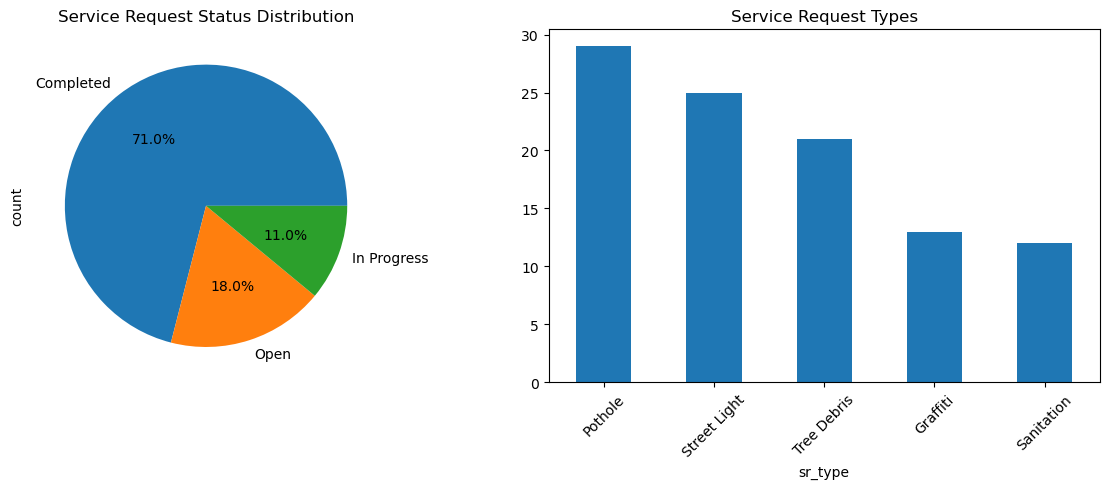


✅ Sample analysis completed!
📌 Replace this sample with your actual data analysis when databases are ready.


In [2]:
# Initialize connections and run analysis
try:
    # Try to initialize database connections
    mongo_handler = MongoDBHandler()
    es_handler = ElasticsearchHandler()
    eda = Chicago311EDA(mongo_handler=mongo_handler, es_handler=es_handler)
    visualizer = Chicago311Visualizer()

    # Run comprehensive analysis
    print("🔍 Running comprehensive analysis...")
    results = eda.run_comprehensive_analysis()
    summary = eda.generate_summary_report()
    print(summary)

    # Generate visualizations
    print("\n📊 Generating visualizations...")
    viz_files = visualizer.generate_comprehensive_report(results, mongo_handler)
    print("Generated visualizations:")
    for name, path in viz_files.items():
        print(f"  📈 {name}: {path}")

    # Cleanup
    mongo_handler.close()
    es_handler.close()
    
except Exception as e:
    print(f"⚠️ Error with database analysis: {e}")
    print("\n📝 Falling back to basic data analysis...")
    print("To use full analysis features, ensure:")
    print("1. MongoDB is running and accessible")
    print("2. ElasticSearch is running and accessible")
    print("3. Data has been loaded into the databases")
    print("\nFor now, you can run basic pandas analysis on CSV data if available.")
    
    # Example with sample data for demonstration
    print("\n📊 Creating sample analysis for demonstration...")
    
    # Create sample Chicago 311 data
    sample_data = pd.DataFrame({
        'sr_number': [f'SR{i:06d}' for i in range(1000, 1100)],
        'sr_type': np.random.choice(['Pothole', 'Street Light', 'Graffiti', 'Tree Debris', 'Sanitation'], 100),
        'status': np.random.choice(['Open', 'Completed', 'In Progress'], 100, p=[0.2, 0.7, 0.1]),
        'ward': np.random.randint(1, 51, 100),
        'created_date': pd.date_range('2023-01-01', '2023-12-31', periods=100),
        'department': np.random.choice(['CDOT', 'Streets & San', 'Buildings', 'Police'], 100)
    })
    
    print(f"📋 Sample dataset created with {len(sample_data)} records")
    print("\nTop 5 rows:")
    print(sample_data.head())
    
    print("\nBasic statistics:")
    print(sample_data['sr_type'].value_counts())
    
    # Simple visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Status distribution
    sample_data['status'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%')
    ax1.set_title('Service Request Status Distribution')
    
    # Service type distribution
    sample_data['sr_type'].value_counts().plot(kind='bar', ax=ax2)
    ax2.set_title('Service Request Types')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Sample analysis completed!")
    print("📌 Replace this sample with your actual data analysis when databases are ready.")

In [3]:
# Test the imports in the notebook environment
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime

warnings.filterwarnings("ignore")

# Add the src directory to the Python path
current_dir = os.path.dirname(os.path.abspath('.'))
src_path = os.path.join(current_dir, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

print("✅ All core libraries imported successfully!")
print(f"Python version: {sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Current working directory: {os.getcwd()}")
print(f"Src path added: {src_path}")

✅ All core libraries imported successfully!
Python version: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 11:23:37) [Clang 14.0.6 ]
Pandas version: 2.2.3
Numpy version: 2.1.3
Current working directory: /Users/rahulmishra/Desktop/MS-Data_Science/Group Project/chicago-311-data-platform/notebooks
Src path added: /Users/rahulmishra/Desktop/MS-Data_Science/Group Project/chicago-311-data-platform/src
